<a href="https://colab.research.google.com/github/jhonnye0/ECOM100_Listas/blob/main/VisaoComp_Lista1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [ ]:
import cv2
import numpy
from matplotlib import pyplot

# Implementações

1.   Convolução - Filter2D
2.   Correlação cruzada

In [184]:
NUMERO_MAGICO = 0.00275

def filter2D(src, kernel):
    if (kernel.shape[0] % 2 == 0) or (kernel.shape[1] % 2 == 0):
        raise ValueError()
    
    if kernel.shape[0] != kernel.shape[1]:
        raise ValueError()
    
    result = numpy.zeros(src.shape)
  
    for i in range(src.shape[0]): # Para cada linha da matriz de entrada
        for j in range(src.shape[1]): # Para cada coluna da matriz de entrada
            for k_i in range(kernel.shape[0]): # Para cada linha do kernel
                for k_j in range(kernel.shape[1]): # Para cada coluna do kernel
                    s_i = i - kernel.shape[0] // 2 + k_i
                    s_j = j - kernel.shape[0] // 2 + k_j
                    
                    if s_i < 0 or s_i >= src.shape[0] or s_j < 0 or s_j >= src.shape[1]:
                        continue
                    else:
                        # kernel_i = kernel.shape[0] - (k_i + 1)
                        # kernel_j = kernel.shape[1] - (k_j + 1)
                        # src_value = m[s_i][s_j]
                        # kernel_value = kernel[kernel_i][kernel_j]
                        # print(f'm[{s_i}][{s_j}] = {src_value}, k[{kernel_i}][{kernel_j}] = {kernel_value}: {src_value} * {kernel_value} = {src_value * kernel_value}')
                        
                        result[i][j] += kernel[-(k_i + 1)][-(k_j + 1)] * src[s_i][s_j]

            # print(f'result[{i}][{j}] = {result[i][j]}')
    
    return result


def cross_correlation(src, kernel):
    if (kernel.shape[0] % 2 == 0) or (kernel.shape[1] % 2 == 0):
        raise ValueError()
    
    if kernel.shape[0] != kernel.shape[1]:
        raise ValueError()
    
    result = numpy.zeros(src.shape)
  
    for i in range(src.shape[0]): # Para cada linha da matriz de entrada
        for j in range(src.shape[1]): # Para cada coluna da matriz de entrada
            for k_i in range(kernel.shape[0]): # Para cada linha do kernel
                for k_j in range(kernel.shape[1]): # Para cada coluna do kernel
                    s_i = i - kernel.shape[0] // 2 + k_i
                    s_j = j - kernel.shape[0] // 2 + k_j
                    
                    if s_i < 0 or s_i >= src.shape[0] or s_j < 0 or s_j >= src.shape[1]:
                        continue
                    else:
                        # kernel_i = kernel.shape[0] - (k_i + 1)
                        # kernel_j = kernel.shape[1] - (k_j + 1)
                        # src_value = m[s_i][s_j]
                        # kernel_value = kernel[kernel_i][kernel_j]
                        # print(f'm[{s_i}][{s_j}] = {src_value}, k[{kernel_i}][{kernel_j}] = {kernel_value}: {src_value} * {kernel_value} = {src_value * kernel_value}')
                        
                        result[i][j] += kernel[k_i][k_j] * src[s_i][s_j]

            # print(f'result[{i}][{j}] = {result[i][j]}')
    
    return result

# Questão 1

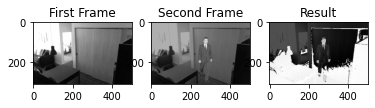

In [78]:
img1_path = '/content/questao1_img/first_frame.jpg'
img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)

img2_path = '/content/questao1_img/second_frame.jpg'
img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)

img2 = cv2.resize(img2, (img1.shape[1], img1.shape[0]), interpolation = cv2.INTER_AREA)

result = img1 - img2

images = [img1, img2, result]
titles = ['First Frame','Second Frame', 'Result']

for i in range(len(images)):
  pyplot.subplot(1,3,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

RESULTADO:

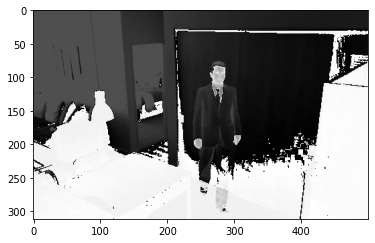

In [79]:
pyplot.imshow(result, 'gray')

# Questão 2



In [82]:
ret, result = cv2.threshold(result, 100, 255, cv2.THRESH_BINARY)

Para melhorar o resultado obtido, aplicamos um threshold na imagem com finalidade de extrair melhor o background

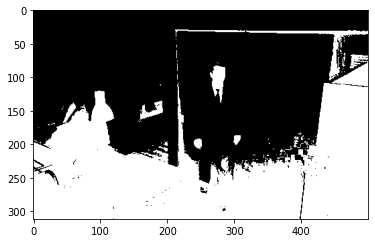

In [83]:
pyplot.imshow(result, 'gray')

# Questão 3

In [95]:
img_path = '/content/questao5_img/threshold_1.jpg'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [89]:
n = int(input())
kernel = numpy.ones((n,n))

for i in range(n):
  kernel[i, :] = numpy.array([float(v.strip()) for v in input().split()]) # leitura pythônica

3
1 0 -1
2 0 -2
1 0 -1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


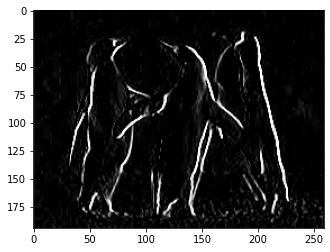

In [109]:
result = filter2D(img, kernel*NUMERO_MAGICO)
pyplot.imshow(result, 'gray')

# Questão 4

In [ ]:
img_path = '/content/questao4_img/medianfilter.png'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Imagens que possuem muito ruído aplica-se então o filtro Median Blur, ideal para imagens muito ruidosas:



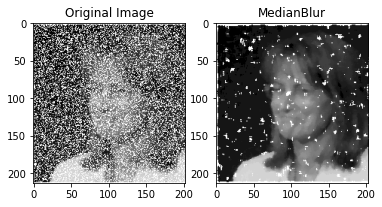

In [ ]:
final = cv2.medianBlur(img, 5)
titles = ['Original Image','MedianBlur']
images = [img, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

No segundo caso para uma suavização mais simples é recomendável o filtro gaussiano:

In [ ]:
img_path = '/content/questao4_img/gaussianfilter.png'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Resultando na imagem com uma suavização mais uniforme

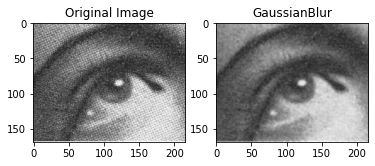

In [ ]:
final = cv2.GaussianBlur(img, ( 3,  3), 0)
titles = ['Original Image','GaussianBlur']
images = [img, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

# Questão 5

In [111]:
img1_path = '/content/questao5_img/threshold_1.jpg'

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2_path = '/content/questao5_img/threshold_2.jpg'

img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3_path = '/content/questao5_img/threshold_3.jpg'

img3 = cv2.imread(img3_path, cv2.IMREAD_GRAYSCALE)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

Será feita a utilização do N = 3, 7 e 11. (Somando de 4 em 4)

PRIMEIRA PÁGINA:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


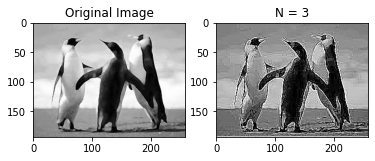

In [129]:
kernel = -1 * numpy.ones((3,3))
kernel[1][1] = 9

final = filter2d(img1, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 3']
images = [img1, final]
  
for i in range(len(images)):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

SEGUNDA IMAGEM:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


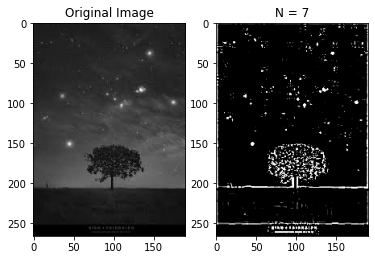

In [169]:
kernel = -1 * numpy.ones((7,7))
kernel[3][3] = 43

final = filter2D(img2, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 7']
images = [img2, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

TERCEIRA IMAGEM

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


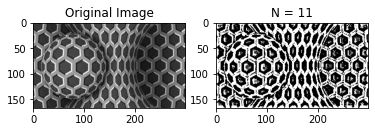

In [157]:
kernel = -1 * numpy.ones((11,11))
kernel[5][5] = 121

final = filter2D(img3, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 11']
images = [img3, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

CONCLUSÃO:


# Questão 6

In [153]:
img1_path = '/content/questao5_img/threshold_1.jpg'

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2_path = '/content/questao5_img/threshold_2.jpg'

img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3_path = '/content/questao5_img/threshold_3.jpg'

img3 = cv2.imread(img3_path, cv2.IMREAD_GRAYSCALE)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

Fizemos um filtro genérico de passa-baixa aplicado com um kernel de dimensões N = 3, 7 e 11.

PRIMEIRA IMAGEM:

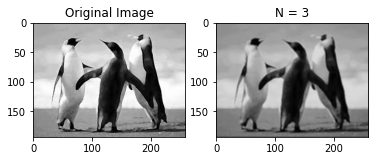

In [155]:
kernel = 1/8 * numpy.ones((3, 3))

final = filter2D(img1, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 3']
images = [img1, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

SEGUNDA IMAGEM:

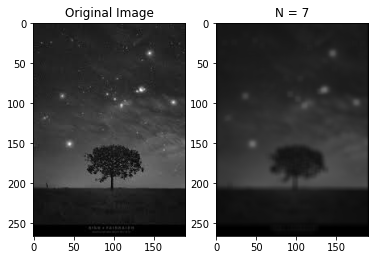

In [160]:
kernel = (1/48) * numpy.ones((7,7))

final = filter2D(img2, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 7']
images = [img2, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

TERCEIRA IMAGEM:

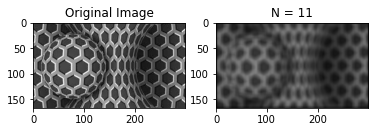

In [162]:
kernel = 1/120 * numpy.ones((11,11))

final = filter2D(img3, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 11']
images = [img3, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

# Questão 7

In [ ]:
img1_path = '/content/questao5_img/threshold_1.jpg'

img1 = cv2.imread(img1_path, cv2.IMREAD_GRAYSCALE)
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2_path = '/content/questao5_img/threshold_2.jpg'

img2 = cv2.imread(img2_path, cv2.IMREAD_GRAYSCALE)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img3_path = '/content/questao5_img/threshold_3.jpg'

img3 = cv2.imread(img3_path, cv2.IMREAD_GRAYSCALE)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

Fizemos um filtro genérico de extração de arestas aplicado com um kernel de dimensões N = 3, 7 e 11.

PRIMEIRA IMAGEM:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


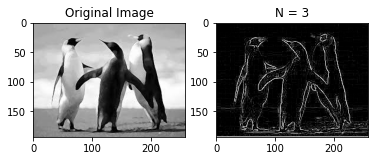

In [165]:
kernel = -1 * numpy.ones((3, 3))
kernel[1][1] = 8

final = filter2D(img1, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 3']
images = [img1, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

SEGUNDA IMAGEM:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


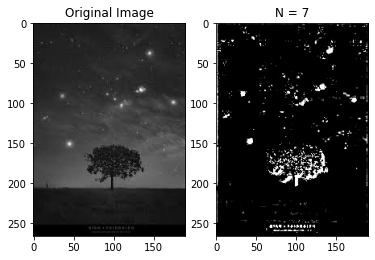

In [173]:
kernel = -1 * numpy.ones((7,7))
kernel[1][1] = 42

final = filter2D(img2, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 7']
images = [img2, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

TERCEIRA IMAGEM:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


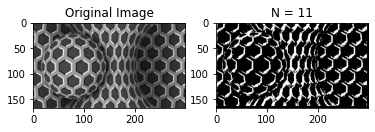

In [172]:
kernel = -1 * numpy.ones((11,11))
kernel[1][1] = 90

final = filter2D(img3, kernel*NUMERO_MAGICO)

titles = ['Original Image','N = 11']
images = [img3, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

# Questão 8

# Questão 9

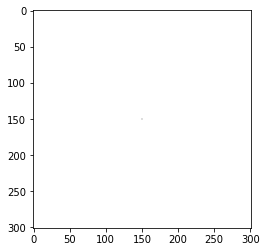

In [185]:
gaussian_kernel = 1/273 * numpy.array([[1,4,7,4,1],
                                      [4,16,26,16,4],
                                      [7,26,41,26,7],
                                      [4,16,26,16,4],
                                      [1,4,7,4,1]])

img = cv2.imread('/content/questao9_img/301x301.png')
pyplot.imshow(img)

IMG * Gaussian_Kernel

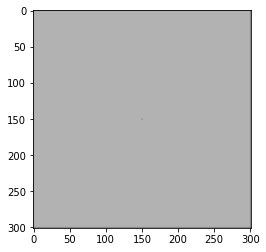

In [190]:
result = filter2D(img, gaussian_kernel*NUMERO_MAGICO)
pyplot.imshow(result)

IMG -**correlação cruzada**- Gaussian_kernel

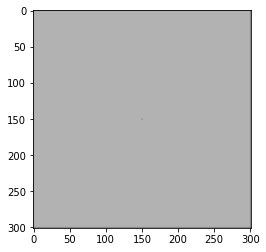

In [192]:
result = cross_correlation(img, gaussian_kernel*NUMERO_MAGICO)
pyplot.imshow(result)

# Questão 10

2
2


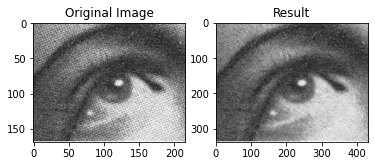

In [201]:
img_path = '/content/questao4_img/gaussianfilter.png'

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

sx, sy = float(input()), float(input())

final = cv2.resize(img, None, fx=sx, fy=sy)

titles = ['Original Image','Result']
images = [img, final]

for i in range(2):
  pyplot.subplot(1,2,i+1), pyplot.imshow(images[i], 'gray')
  pyplot.title(titles[i])

# Questão 11